# 2022-01-04 • Hello Julia

In [5]:
1

1

Time to evaluate this code cell after kernel restart: 14 à 21 seconds.  
So restarting kernel is to be avoided..

Also note, starting julia interpreter in terminal is faster, less than a second.

## Plots

In [2]:
@time using Plots

  9.133000 seconds (8.27 M allocations: 572.587 MiB, 2.80% gc time, 8.71% compilation time)


In [38]:
gr()

Plots.GRBackend()

In [39]:
default(legend=:none, size=(300,120))

In [40]:
using Random

In [94]:
Random.seed!(2022)

x = randn(10);

  0.000854 seconds (1.29 k allocations: 74.836 KiB)


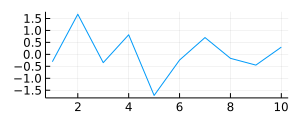

In [42]:
@time plot(x)

In [43]:
@time pyplot()

  0.000031 seconds (6 allocations: 576 bytes)


Plots.PyPlotBackend()

Can set default with `ENV["PLOTS_DEFAULT_BACKEND"] = "pyplot"`

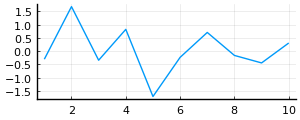

In [45]:
p = plot(x)

In [117]:
import PyPlot: matplotlib, subplots, version

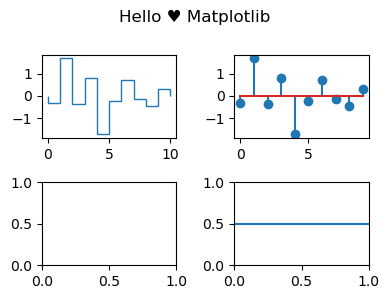

PyObject <matplotlib.lines.Line2D object at 0x0000000096C6FD00>

In [105]:
fig, ax = subplots(2,2, figsize=(4,3))
fig.suptitle("Hello ♥ Matplotlib")
fig.tight_layout()
ax[1,1].stairs(x)
ax[1,2].stem(x)
ax[2,2].axhline(0.5)

In [62]:
fig.dpi_scale_trans

PyObject <matplotlib.transforms.Affine2D object at 0x0000000084780520>

Amazing. We have access to the _entirety_ of matplotlib (and an up-to-date version too).

In [118]:
print("mpl version $version")

mpl version 3.5.1

## Units 

In [1]:
@time using Unitful, UnitfulRecipes

  0.397959 seconds (710.74 k allocations: 45.410 MiB, 0.77% compilation time)


In [2]:
using Unitful.DefaultSymbols  # m, cm, …

In [59]:
ENV["UNITFUL_FANCY_EXPONENTS"] = true

true

In [4]:
x = 7cm/s

7 cm s⁻¹

In [5]:
typeof(x)

Quantity{Int64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(cm, s⁻¹), 𝐋 𝐓⁻¹, nothing}}

In [6]:
[1.0m, 2.0*cm, 3.0 * km]

3-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(m,), 𝐋, nothing}}}:
    1.0 m
   0.02 m
 3000.0 m

In [7]:
[2:5;] * kg

4-element Vector{Quantity{Int64, 𝐌, Unitful.FreeUnits{(kg,), 𝐌, nothing}}}:
 2 kg
 3 kg
 4 kg
 5 kg

## Numeric processing performance of unitful arrays

In [255]:
using BenchmarkTools

In [272]:
z, q = randn(2000); randn(2000);

In [276]:
zz, qq = z*kg, q*mV/s;

In [277]:
@benchmark zz ./ qq

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  1.844 μs … 253.278 μs  ┊ GC (min … max):  0.00% … 95.76%
 Time  (median):     3.267 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   4.136 μs ±  11.771 μs  ┊ GC (mean ± σ):  15.04% ±  5.24%

      ▂   █▃  ▁                                                
  ▂▃▃▄█▇▇▇██▇▆██▇▅▅▆█▇▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  1.84 μs         Histogram: frequency by time        9.41 μs <

 Memory estimate: 15.81 KiB, allocs estimate: 3.

In [278]:
@benchmark z ./ q

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.744 μs … 794.422 μs  ┊ GC (min … max):  0.00% … 98.60%
 Time  (median):     4.289 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   5.606 μs ±  17.058 μs  ┊ GC (mean ± σ):  14.77% ±  5.25%

  ▆▂ ▇  ▃█▂▃                                                   
  ██▇█▅▆█████▇▄▃▃▄▄▄▄▃▃▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  2.74 μs         Histogram: frequency by time        14.6 μs <

 Memory estimate: 15.81 KiB, allocs estimate: 3.

Unitful array math just as fast as plain float array math 🤯  
Thanks to it doing the unit calculations at compile time. Gives verbose types, but fast speedy numerics.

## Array wrapper

In [3]:
using Unitful
import Unitful: kg, s, ms, mV, Hz

In [42]:
module Shorthands
const Float = Float64
const Optional{T} = Union{T,Nothing} where T
const mime_multiline = MIME("text/plain")
export Float, Optional, mime_multiline
end
using .Shorthands

In [130]:
"""Add `IOContext` settings to an `IO` object if they have not been set yet."""
function add_defaults(io::IO, defaults::Pair...)::IO
    settings = merge(Dict(defaults), IOContext(io).dict)
    IOContext(io, settings...)
end;

In [10]:
Base.show(io::IO, x::Float) = 
    Base.@invoke show(add_defaults(io, :compact=>true)::IO, x::Union{Float16,Float32,Float64})
    # this works (i.e. is non-recursive) because we only define it for Float64, not the Union

In [11]:
Base.show(io::IO, ::MIME"text/plain", x::Quantity) =
    Base.@invoke show(add_defaults(io, :fancy_exponent=>true)::IO, x::Quantity)
    # this works because Unitful defined a `show` for both with and without mime; we invoke the without here.

In [12]:
0.1*3 * mV/ms

0.3 mV ms⁻¹

In [240]:
#=
`showarg` is called by `summary`, which is in turn called by `show`.
It is the "Vector{ElType}" part in "300-element Vector{Eltype}: …"
=#
"""Show summary of the type of a unitful array."""
function Base.showarg(io::IO, x::AbstractArray{<:Quantity}, toplevel)
    print(io, x isa Vector ? "Vector" : 
              x isa Matrix ? "Matrix" :
              nameof(typeof(x)))
    el = first(x)
    io = add_defaults(io, :fancy_exponent=>true)  # m² instead of m^2
    print(io, "{", typeof(el.val), ", ", unit(el), "}")
    # if integrating in Unitful, a todo: handle heterogeneous arrays.
end;

In [241]:
function Base.show(io::IO, ::MIME"text/plain", x::AbstractArray{<:Quantity})
    summary(io, x)
    println(io, ":")
    Base.print_array(io, ustrip(x))
end

In [242]:
rand(Int8, 4)kg/s

4-element Vector{Int8, kg s⁻¹}:
   20
  -39
 -115
   91

In [244]:
# use ctrl-enter

In [280]:
module S

import Unitful: Time, Quantity, unit, ustrip, numtype
using Base.Iterators
using PyFormattedStrings
using ..Shorthands
using .Main

"""An array where one dimension represents evenly spaced samples in time."""
struct Signal{T,N} <: AbstractArray{T,N}
    
    data::AbstractArray{T,N}
    
    """Time between two samples. Reciprocal of sampling frequency."""
    Δt::Time
    
    """Optional description of the values in `data`. E.g. "Membrane potential"."""
    description::Optional{AbstractString}
    
    """Time dimension of the array. Defaults to `1`."""
    tdim::Int
end

# Allow `description` and `tdim` as optional keywords.
# non-todo: macro this (`Base.@kwdef` or Parameters.jl no good: can't have mix of kw and non-kw).
Signal(d, Δt, description; tdim=1) = Signal(d, Δt, description, tdim)
Signal(d, Δt; description=nothing, tdim=1) = Signal(d, Δt, description, tdim)

Base.size(x::Signal) = size(x.data)
Base.getindex(x::Signal{T,N}, I::Vararg{Int, N}) where {T,N} = x.data[I...]
Base.setindex!(x::Signal{T,N}, v, I::Vararg{Int, N}) where {T,N} = (x.data[I...] = v)

duration(x::Signal) = size(x, x.tdim) * x.Δt

function Base.summary(io::IO, x::Signal)
    print(io, Base.dims2string(size(x)), ' ')
    isnothing(x.description) || print(io, '"', x.description, '"', ' ')
    Base.showarg(io, x, true)
    print(io, ", duration ", duration(x))
end

function Base.show(io::IO, ::MIME"text/plain", x::Signal)
    print(io, Base.dims2string(size(x)))
    isnothing(x.description) || print(io, ' ', '"', x.description, '"')
    println(io, " Signal:\n")
    el = first(x)
    isunitful = (el isa Quantity)
    isunitful && (io = Main.add_defaults(io, :fancy_exponent=>true))  # m² instead of m^2
    Base.print_array(io, isunitful ? ustrip(x) : x)
    println(io, "\n")
    printrow(key, val) = println(io, lpad(key, 9), ": ", val)
    isunitful && printrow("units", unit(el))
    printrow("duration", f"{duration(x)} (Δt: {x.Δt})")
    printrow("dtype", isunitful ? typeof(el.val) : typeof(el))
end

end;

In [259]:
# use ctrl-enter

In [260]:
x = S.Signal(randn(2000)*mV/ms, 0.1*ms, "Membrane potential")
x

2000-element "Membrane potential" Signal:

 -0.53508
 -1.05966
  0.200328
 -2.70706
 -0.538937
 -0.63484
  0.507051
  0.627075
 -0.663051
  0.662328
 -1.96189
  0.441242
  0.408328
  ⋮
 -0.222719
 -0.934877
  0.431609
  0.0725057
 -1.36245
  2.13669
  1.75368
  1.04932
 -0.999424
  0.154111
 -1.05527
 -0.999598

    units: mV ms⁻¹
 duration: 200.0 ms (Δt: 0.1 ms)
    dtype: Float64


In [202]:
print(summary(x))

2000-element "Membrane potential" Signal(Float64, mV ms⁻¹), duration 200.0 ms

In [151]:
y = S.Signal(randn(3,90), 0.5ms, tdim=2)

3×90 Signal:

  0.119297   0.109232  -0.380801  …  -0.350973   1.73712   -0.798376
 -0.307181  -0.422936   0.912106      0.975326  -1.27965    1.26854
 -0.502739   1.14168    0.899721     -0.52512    0.583211   1.34904

 duration: 45.0 ms (Δt: 0.5 ms)
    dtype: Float64


In [153]:
typeof(y)

Main.S.Signal{Float64, 2}

In [154]:
typeof(x)

Main.S.Signal{Quantity{Float64, 𝐋^2 𝐌 𝐈^-1 𝐓^-4, Unitful.FreeUnits{(ms^-1, mV), 𝐋^2 𝐌 𝐈^-1 𝐓^-4, nothing}}, 1}

In [18]:
import Unitful: Voltage, Time, Current

In [19]:
Voltage

Union{Quantity{T, 𝐋^2 𝐌 𝐈^-1 𝐓^-3, U}, Level{L, S, Quantity{T, 𝐋^2 𝐌 𝐈^-1 𝐓^-3, U}} where {L, S}} where {T, U}

In [20]:
Time

Union{Quantity{T, 𝐓, U}, Level{L, S, Quantity{T, 𝐓, U}} where {L, S}} where {T, U}